In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv("train.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39424,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
39425,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
39426,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
39427,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [3]:
df.fillna(value='missing', inplace=True)

In [4]:
Df2 = df



In [5]:
Df2 = Df2[Df2['income_>50K'] == 1]

In [6]:
Df2 = Df2.drop(['age','fnlwgt','educational-num',
          'capital-gain','capital-loss','workclass','native-country','marital-status'], axis=1)

In [7]:
Df2

,education,occupation,relationship,race,gender,hours-per-week,income_>50K
0,Doctorate,Exec-managerial,Not-in-family,White,Male,60,1
2,Bachelors,Exec-managerial,Husband,White,Male,40,1
8,HS-grad,Exec-managerial,Husband,White,Male,45,1
15,HS-grad,Exec-managerial,Husband,White,Male,40,1
17,Doctorate,Prof-specialty,Husband,White,Male,50,1
...,...,...,...,...,...,...,...
39412,Bachelors,missing,Wife,White,Female,45,1
39415,HS-grad,Transport-moving,Husband,White,Male,48,1
39418,Bachelors,Exec-managerial,Husband,White,Male,40,1
39420,Assoc-voc,Exec-managerial,Not-in-family,White,Male,40,1


In [8]:
# Df2['education'].values

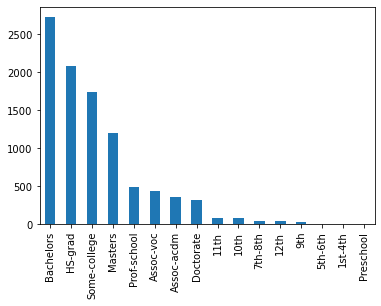

In [9]:
ax = Df2["education"].value_counts().plot(kind='bar')
plt.show()

In [10]:
# Non_edu= Df2[(Df2['education'] != 'Bachelors') & (Df2['education'] != 'Doctorate') & 
#     (Df2['education'] != 'Some-college') & (Df2['education'] != 'Masters') & (Df2['education'] != 'Assoc-voc') &
#             (Df2['education'] != 'Prof-school')]


In [11]:
# Non_edu


In [12]:
# Non_edu_count = Non_edu[Non_edu.columns[0]].count()
# Non_edu_count

In [13]:
# Edu = Df2[(Df2['education'] == 'Bachelors') | (Df2['education'] == 'Doctorate') | 
#     (Df2['education'] == 'Some-college') | (Df2['education'] == 'Masters') | (Df2['education'] == 'Assoc-voc')
#          | (Df2['education'] == 'Prof-school')]

In [14]:
# Edu_count = Edu[Edu.columns[0]].count()
# Edu_count

In [15]:
# index = ['No College', 'College']
# Col_plot = pd.DataFrame({'No_College': Non_edu_count,
#                    'College': Edu_count}, index=index)
# ax = Col_plot.plot.bar(rot=0)

In [16]:
# index = ['No Colge', 'College']
# Col_plot = pd.DataFrame({'No_College': Non_edu_count,
#                         'College': Edu_count}, index=index)
# ax = Col_plot.plot.bar(rot=0)

## Decision Tree

In [17]:
X = df.drop(['age','fnlwgt','income_>50K','educational-num','capital-gain','capital-loss','workclass','native-country','marital-status'], axis=1) 

y = df[['income_>50K']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [18]:
columns = []
for col in X:
    columns.append(col)


columns


['education', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week']

In [19]:
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(X_train[['education', 'occupation', 'race', 'gender','relationship']])
X_train_ohe = ohe.transform(X_train[['education', 'occupation', 'race', 'gender','relationship']]).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train[['education', 'occupation', 'race', 'gender','relationship']].columns))

ohe_df.head()

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,...,race_Other,race_White,gender_Female,gender_Male,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
X_train = X_train.reset_index()

In [21]:
# ohe_df['age'] = X_train['age']
ohe_df['hours-per-week'] = X_train['hours-per-week']


In [22]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

clf.fit(ohe_df, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

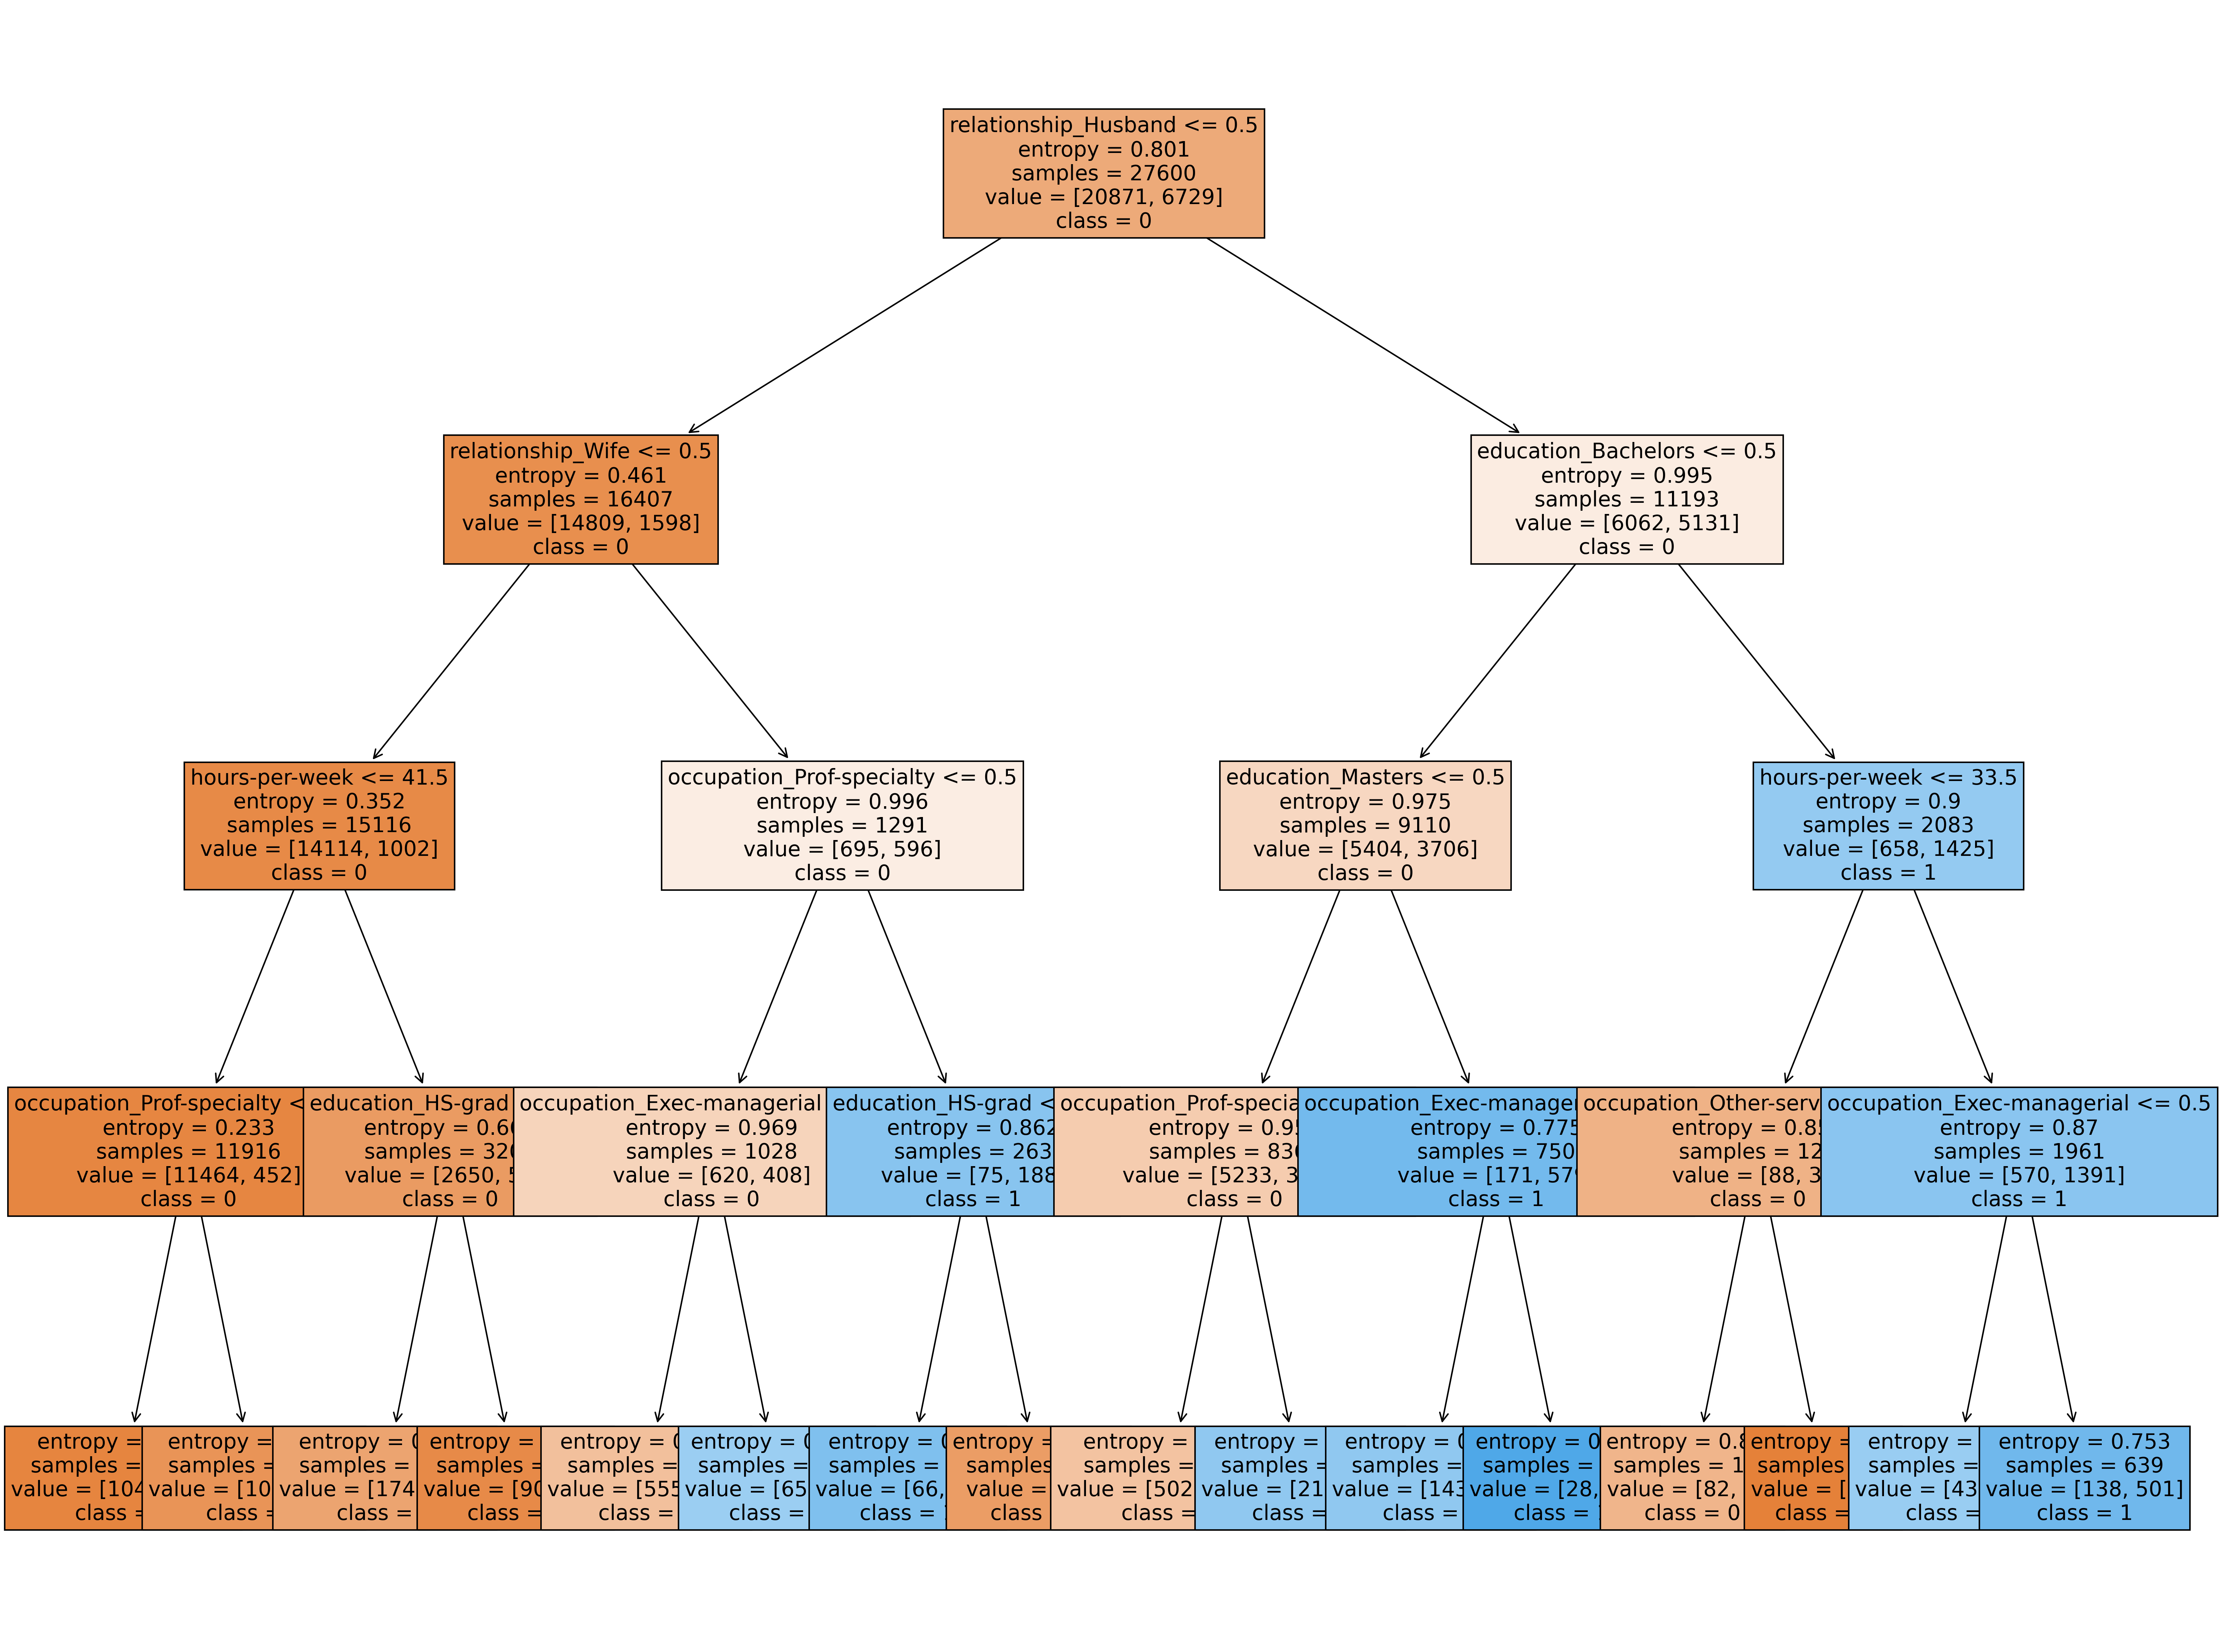

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (25,20), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True,
              fontsize=14)
plt.show()

In [24]:
X_test = X_test.reset_index()

X_test_ohe = ohe.transform(X_test[['education', 'occupation', 'race', 'gender','relationship']]).toarray()
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test[['education', 'occupation', 'race', 
                                                                               'gender','relationship']].columns))
# X_test_ohe_df['age'] = X_test['age']
X_test_ohe_df['hours-per-week'] = X_test['hours-per-week']

y_preds = clf.predict(X_test_ohe_df)

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:

print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_preds) * 100))
print('Precision Score: ', precision_score(y_test, y_preds))
print(clf.score(ohe_df, y_train))


print('Classification Report: ', classification_report(y_test, y_preds, target_names=['under 50k', 'over 50k']))

Testing Accuracy for Decision Tree Classifier: 81.88%
Precision Score:  0.7361623616236163
0.8173188405797102
Classification Report:                precision    recall  f1-score   support

   under 50k       0.83      0.95      0.89      8917
    over 50k       0.74      0.41      0.53      2912

    accuracy                           0.82     11829
   macro avg       0.78      0.68      0.71     11829
weighted avg       0.81      0.82      0.80     11829



## Random Forest

In [26]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.14148846e-02, 0.00000000e+00, 1.52031792e-02,
       5.24219539e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.70412467e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.68016048e-04,
       0.00000000e+00, 7.16100884e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.49472573e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.53172636e-01,
       7.91954222e-02])

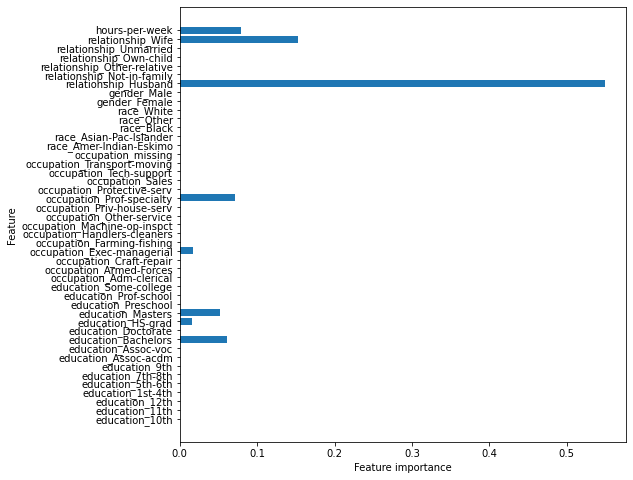

In [27]:
def plot_feature_importances(model):
    n_features = ohe_df.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ohe_df.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [28]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 8, class_weight = 'balanced')
forest.fit(ohe_df, y_train)

C:\Users\albetorres\AppData\Local\Temp\ipykernel_21736\868609342.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(ohe_df, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8)

In [29]:
forest_preds = forest.predict(X_test_ohe_df)

In [30]:
# Training accuracy score
forest.score(ohe_df, y_train)

0.7505797101449275

In [31]:
# Test accuracy score
forest.score(X_test_ohe_df, y_test)

0.7471468425057063

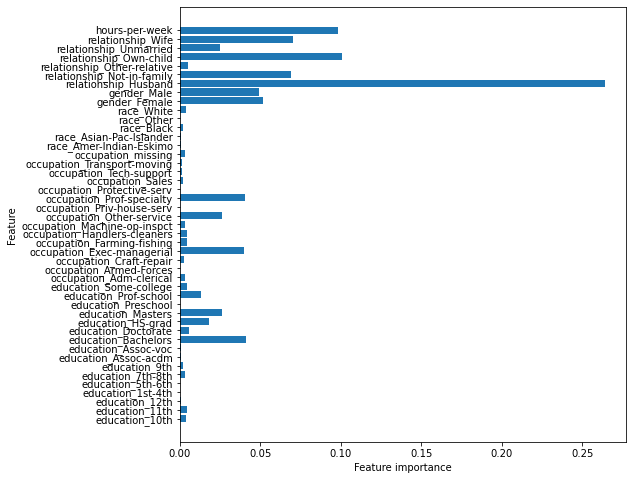

In [32]:
plot_feature_importances(forest)

In [33]:
print('Classification Report: ', classification_report(y_test, forest_preds, target_names=['under 50k', 'over 50k']))

Classification Report:                precision    recall  f1-score   support

   under 50k       0.94      0.71      0.81      8917
    over 50k       0.49      0.86      0.63      2912

    accuracy                           0.75     11829
   macro avg       0.72      0.79      0.72     11829
weighted avg       0.83      0.75      0.76     11829

